# Gradients

In [ ]:
% matplotlib inline
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
from skimage.transform import rescale
import matplotlib.pylab as pylab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


<Figure size 432x288 with 0 Axes>

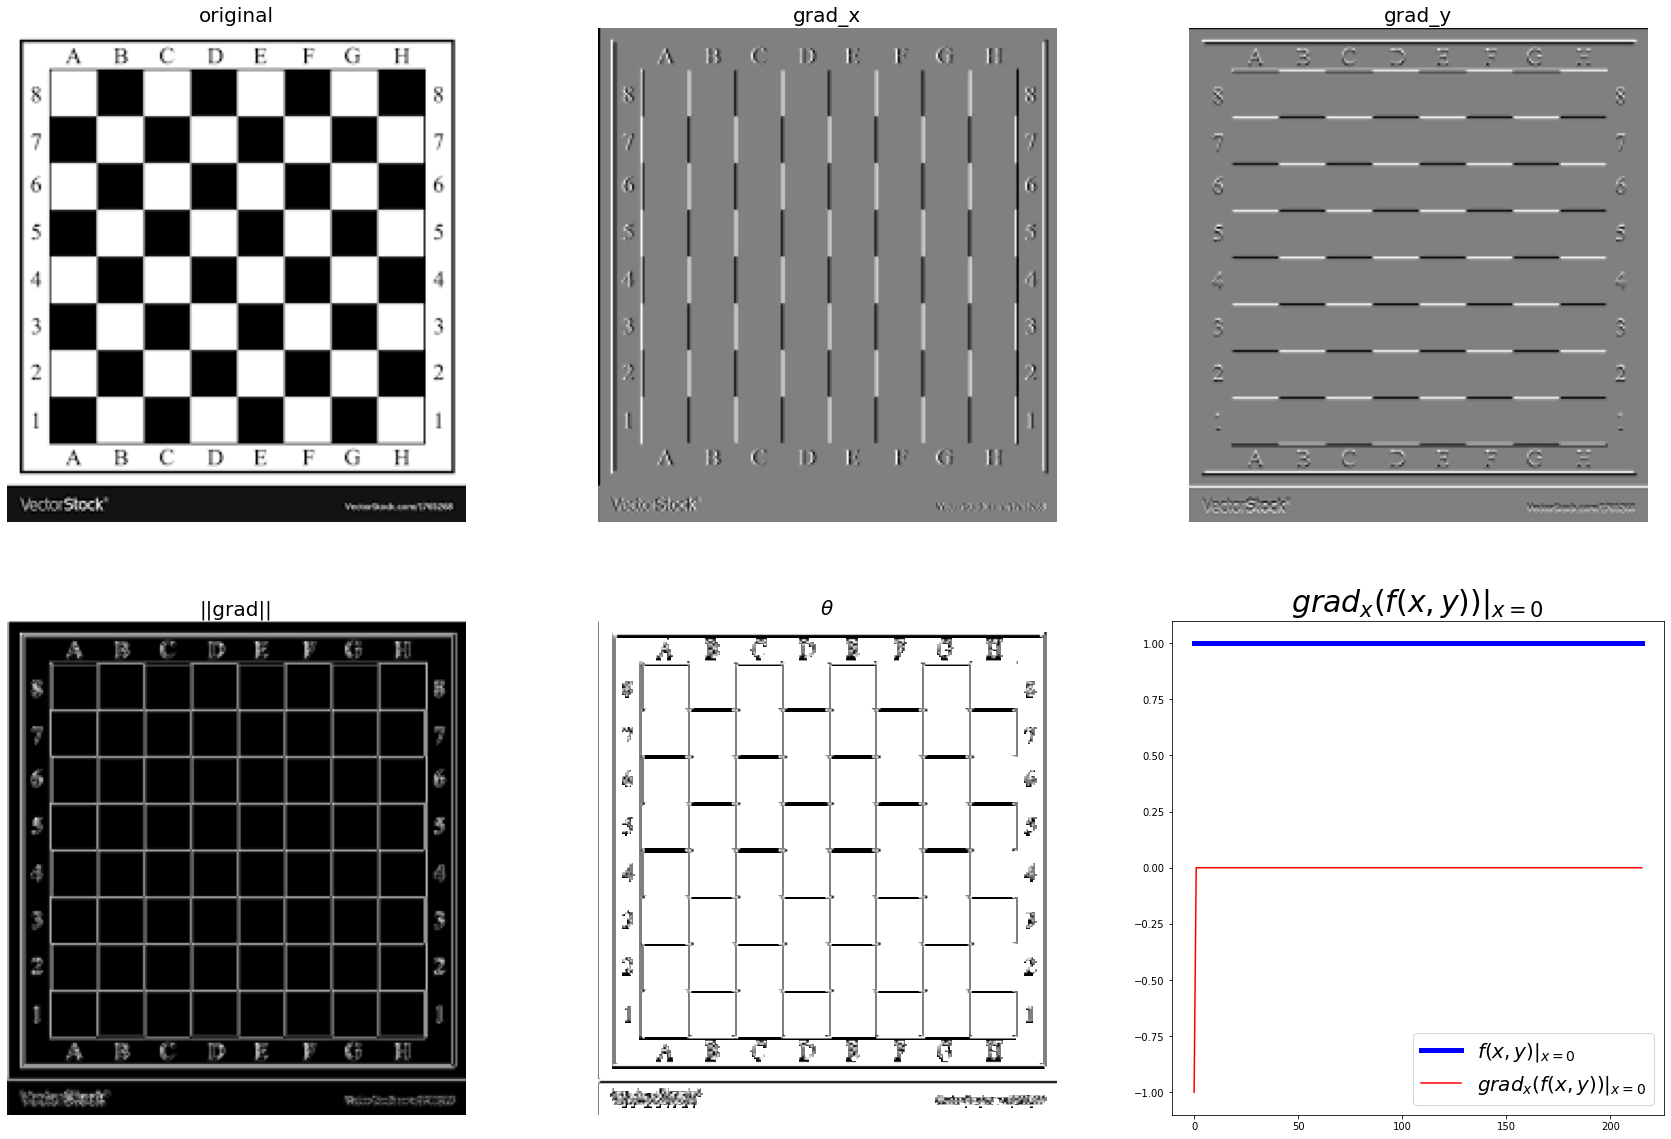

In [ ]:
def plot_image(image, title):
    plt.imshow(image), plt.title(title, size=20), plt.axis('off')
    
ker_x = [[-1, 1]]
ker_y = [[-1], [1]]
im = rgb2gray(imread('/content/chess.png'))
im_x = signal.convolve2d(im, ker_x, mode='same')
im_y = signal.convolve2d(im, ker_y, mode='same')
im_mag = np.sqrt(im_x**2 + im_y**2)
im_dir = np.arctan(im_y/im_x)
plt.gray()
plt.figure(figsize=(30,20))
pylab.subplot(231), plot_image(im, 'original'), pylab.subplot(232),
plot_image(im_x, 'grad_x')
pylab.subplot(233), plot_image(im_y, 'grad_y'), pylab.subplot(234),
plot_image(im_mag, '||grad||')
pylab.subplot(235), plot_image(im_dir, r'$\theta$'), pylab.subplot(236)
pylab.plot(range(im.shape[1]), im[0,:], 'b-', label=r'$f(x,y)|_{x=0}$', linewidth=5)
pylab.plot(range(im.shape[1]), im_x[0,:], 'r-', label=r'$grad_x (f(x,y))|_{x=0}$')
pylab.title(r'$grad_x (f(x,y))|_{x=0}$', size=30)
pylab.legend(prop={'size': 20})
pylab.show()